In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'DATA/gene_expression.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

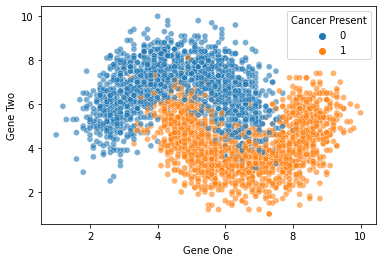

In [7]:
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present',alpha=0.6)

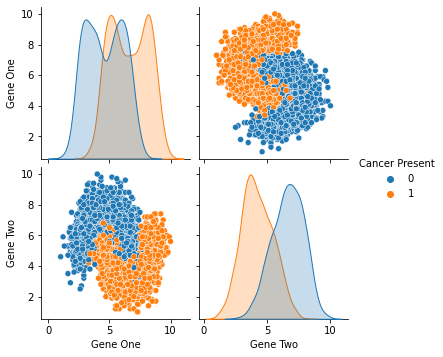

In [8]:
sns.pairplot(data=df,hue='Cancer Present')

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
X = df.drop('Cancer Present',axis=1)

In [11]:
y = df['Cancer Present']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
scaler = StandardScaler()

In [14]:
scaled_X_train = scaler.fit_transform(X_train)

In [15]:
scaled_X_test = scaler.transform(X_test)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [19]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [20]:
y_pred = knn_model.predict(scaled_X_test)

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
confusion_matrix(y_test,y_pred)

array([[420,  50],
       [ 47, 383]])

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       470
           1       0.88      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



In [24]:
from sklearn.metrics import accuracy_score

test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)
    
    y_pred_test = knn_model.predict(scaled_X_test)
    test_error = 1-accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Neighbors')

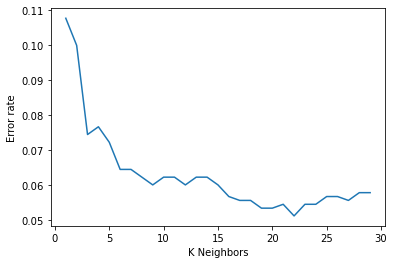

In [26]:
plt.plot(range(1,30),test_error_rates)
plt.ylabel('Error rate')
plt.xlabel('K Neighbors')

### PIPELINE --> GRIDSEARCH CV

In [28]:
scaler = StandardScaler()

In [30]:
knn = KNeighborsClassifier()

In [31]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [32]:
operations = [
                ('scaler',scaler),
                ('knn',knn)
             ]

In [33]:
from sklearn.pipeline import Pipeline

In [34]:
pipe = Pipeline(operations)

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
k_values = list(range(1,20))

In [37]:
param_grid = {'knn__n_neighbors':k_values}

In [38]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [39]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [42]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=14))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=14),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 14,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [44]:
full_pred = full_cv_classifier.predict(X_test)

In [45]:
print(classification_report(y_test,full_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.93       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [46]:
new_patient = [[3.8,6.4]]

In [47]:
full_cv_classifier.predict(new_patient)

array([0])